# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Mississauga, Ontario, Canada**, or **Canada** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Mississauga, Ontario, Canada** to Ann Arbor, USA. In that case at least one source file must be about **Mississauga, Ontario, Canada**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Mississauga, Ontario, Canada** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

<IPython.core.display.Javascript object>


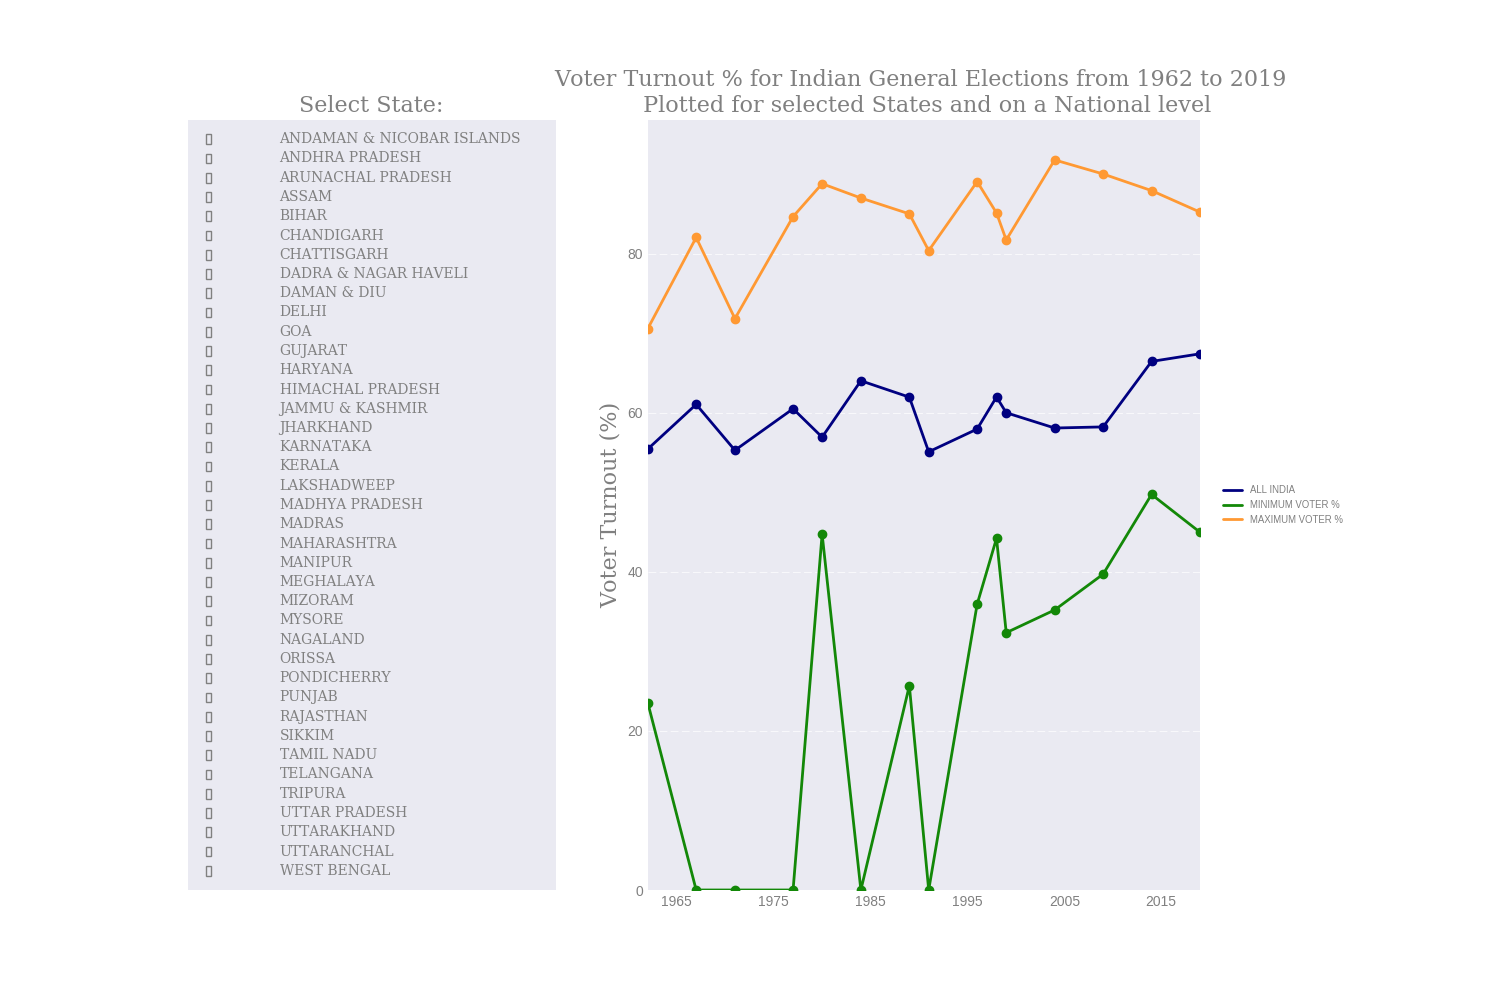

0

In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import itertools
from matplotlib.widgets import CheckButtons
from matplotlib import gridspec

# Reading data file for voter data
def read_file():
    voter_data = pd.read_excel('Indian_Voter_Data_1962_2019.xlsx')
    voter_data['Percentage'] = voter_data['Percentage']*100
    min_voter_data = voter_data[['Year','Percentage']].groupby('Year').agg(min).reset_index()
    max_voter_data = voter_data[['Year','Percentage']].groupby('Year').agg(max).reset_index()
    country_voter_data = voter_data[voter_data['StateName'] == 'TOTAL'][['Year','Percentage']]
    return voter_data,min_voter_data,max_voter_data,country_voter_data

# Initializing data files and data required for the plot
font = {'family': 'serif',
        'color':  'grey',
        'weight': 'normal',
        'size': 16,
        } ## Font family used for titles
voter_data,min_voter_data,max_voter_data,country_voter_data = read_file()
states = voter_data['StateName'].unique().tolist() ## State list
states.remove('TOTAL') ## Removing the TOTAL entry as it is not required in the states list. It refers to the national average which is plotted separately
states.remove('GOA, DAMAN & DIU') ## This is a data issue in the Election Commission data from 1962-1984 after which these territories were tracked independently. To prevent confusion with selection, removing this entry 
states.sort()
plotted = [] ##Initializing list to track plotted states

gs = gridspec.GridSpec(1, 2, width_ratios=[2, 3],right=0.8) 
plt.figure(figsize=(15.0,10.0))
plt.style.use('seaborn-dark')
ax1 = plt.subplot(gs[1]) ##Subplot to hold the actual graph
ax2 = plt.subplot(gs[0]) ## Subplot to hold the state list for selection
mapcolor = {} ## Initializing color map to hold colors that will be used for each state. 

# Populating the color map
def make_colors():
    global mapcolor
    for state in states:
        mapcolor[state] = np.random.rand(3,)

make_colors()

# Plotting function to plot the following:
# 1. Line plot for national voter turnout %, maximum and minimum voter turnout % and state-level vote turnout % per year
# 2. Scatter plot to highlight each data point
def plot_global(dataset,label,visible,color=None,linewidth = None,marker = None):
    plot = ax1.plot(pd.to_datetime(dataset['Year'].values,format='%Y'),
            dataset['Percentage'].values,'-',
            label = label,
            linewidth = linewidth or 2.0,
            color = color,
            visible=visible
             )
    scatter = ax1.scatter(pd.to_datetime(dataset['Year'].values,format='%Y'),
                dataset['Percentage'].values,
                marker=marker or '.',
                c = color,
                visible = visible
               )
    legend = ax1.legend(loc='center',bbox_to_anchor=(1.15,0.5), frameon=False,fontsize='x-small')
    plt.setp(legend.get_texts(), color='grey')
    return plot[0]


# Setting plot parameters for the main plot and plotting out the national, maximum and minimum graphs
def plot_data():
    years = mdates.YearLocator()
    yearfmt = mdates.DateFormatter('%Y')
    minyear = pd.to_datetime(voter_data['Year'].min(),format = "%Y")
    maxyear = pd.to_datetime(voter_data['Year'].max(),format = "%Y")
    ax1.xaxis.set_major_formatter(yearfmt)
    ax1.set_xlim(minyear,maxyear) 
    plot_global(dataset = country_voter_data,label = 'ALL INDIA',color = '#000080',visible=True,marker='o')
    plot_global(dataset = min_voter_data,label = 'MINIMUM VOTER %',color = '#138808',visible=True,marker='o')
    plot_global(dataset = max_voter_data,label = 'MAXIMUM VOTER %',color = '#FF9933',visible=True,marker='o')
    ax1.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on',colors='grey')
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['left'].set_color('grey')
    ax1.spines['bottom'].set_color('grey')
    ax1.yaxis.grid(linestyle='--',linewidth=0.5)
    ax1.set_ylim(bottom=0)
    ax1.set_ylabel('Voter Turnout (%)',family='serif',weight='normal',color='grey',size = 16)

    ax1.set_title('Voter Turnout % for Indian General Elections from 1962 to 2019 \n Plotted for selected States and on a National level',fontdict=font)

# Function to plot graph for the state passed in    
def plot_states(state):
    if state != 'TOTAL':
        data = voter_data[voter_data['StateName'] == state]
        line = plot_global(dataset = data,label = state,linewidth=1.0,visible=True,color=mapcolor[state])


# Select function to track the states selected / de-selected by the user and re-plotting accordingly
def select(label):
    global plotted
    if label not in plotted:
        plotted.append(label)
    else:
        plotted.remove(label)
    ax1.cla()
    plot_data()
    for label in plotted:
        plot_states(label)
    ax1.draw()

# Setting up the selection list for user to select states
ax2.set_title('Select State:',fontdict=font)
plot_data()
labels = states
visibility = [False for i in states]
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
check = CheckButtons(ax2, labels,visibility)
for label in check.labels:
    label.set_family('serif')
    label.set_color('grey')
for rect in check.rectangles:
    rect.set_ec('grey')
    rect.set_linestyle('-')

# Wiring up the click action when user selects a state in the list
check.on_clicked(select)    




In [6]:
plt.savefig('Assignment_4.png', bbox_inches='tight',transparent=True)
